Try to predict a value based on two or more variables - model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data.

### Linear regression with multiple variables

In [1]:
println("Linear regression with multiple variable:")

Linear regression with multiple variable:


We load important packages that will help us do this in Julia

In [4]:
using CSV
using DataFrames
using Plots
using ForwardDiff
using PlotlyJS
using WebIO
using Statistics

gr()
Plots.GRBackend()
Plots.gr() # I prefer the default GR backend 

Plots.GRBackend()

Our goal in this exercise is know what a good market price for a house would be — based on the the size of the house and the number of bedrooms. So, there are 2 features

Load the data file ex1data2.csv — The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.


In [6]:
C = CSV.read("ex1data2.csv", DataFrame)

,sqft,bedrooms,price
,Int64,Int64,Int64
1,2104,3,399900
2,1600,3,329900
3,2400,3,369000
4,1416,2,232000
5,3000,4,539900
6,1985,4,299900
7,1534,3,314900
8,1427,3,198999
9,1380,3,212000


Let's take a look at it after loading

In [6]:
size(C)


(47, 3)

In [7]:
describe(C)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,sqft,2000.68,852,1888.0,4478,0,Int64
2,bedrooms,3.17021,1,3.0,5,0,Int64
3,price,3.40413e5,169900,299900.0,699900,0,Int64


In [9]:
mu_sqft = mean(C.sqft)

2000.6808510638298

In [8]:
mu_sqft = mean(C.sqft)
mu_bedrooms = mean(C.bedrooms)

3.1702127659574466

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

* Subtract the mean value of each feature from the dataset.
* After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviation

This article offers a good background as to Why, How, and When to scale our feature sets:
https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e

In [3]:
mu_sqft = mean(C.sqft)
mu_bedrooms = mean(C.bedrooms)
std_sqft = std(C.sqft)
std_bedrooms = std(C.bedrooms)

featureNormalize(x) = (x .- mean(x)) ./ std(x)

n_sqft = featureNormalize(C.sqft)
n_bedrooms = featureNormalize(C.bedrooms)

47-element Vector{Float64}:
 -0.2236751871685913
 -0.2236751871685913
 -0.2236751871685913
 -1.5377669117840669
  1.0904165374468842
  1.0904165374468842
 -0.2236751871685913
 -0.2236751871685913
 -0.2236751871685913
 -0.2236751871685913
  1.0904165374468842
 -0.2236751871685913
 -0.2236751871685913
  ⋮
 -0.2236751871685913
 -0.2236751871685913
  1.0904165374468842
  1.0904165374468842
  1.0904165374468842
 -1.5377669117840669
 -0.2236751871685913
  1.0904165374468842
 -0.2236751871685913
 -1.5377669117840669
  1.0904165374468842
 -0.2236751871685913

A quick scatter plot shows the positive correlation between the size of the hourse and the price of the house — price increase with the increse in the size

In [14]:
x1 = C.sqft
y = C.price
gr()
price_scatter_size_plot = Plots.plot(x1, y, seriestype = :scatter, title = "Scatter Plot", markersize=3,
        alpha=.8,
        legend=false, 
        xlabel="Home Size - Sq Ft",
        ylabel="Price of the home")

Plots.savefig(price_scatter_size_plot, "Price-Size-Scatter-Plot.png")

In [13]:
x2 = C.bedrooms
y = C.price
gr()
price_scatter_nbr_plot = Plots.plot(x2, y, seriestype = :scatter, title = "Scatter Plot", markersize=3,
        alpha=.8,
        legend=false, 
        xlabel="Number of bedrooms",
        ylabel="Price of the home")

Plots.savefig(price_scatter_nbr_plot, "Price-NoBedrooms-Scatter-Plot.png")Plots.savefig(, "Price-NoBedrooms-Scatter-Plot.png")

In [6]:
#n_sqft = featureNormalize(C.sqft)
#n_bedrooms = featureNormalize(C.bedrooms)

m = length(y)
x0 = ones(m, 1)
X = hcat(x0, n_sqft, n_bedrooms);

# define cost function J
function CostFunction(X, y, theta)
    JTheta = (1 / (2 * m)) * (sum((X * theta - y) .^ 2))
    return JTheta
end

thetaInitial = zeros(3)
#CostFunction(X, y, thetaInitial)

# Gradinet Descent

iterations = 50;
alpha = 0.1;

result = []


f(theta::Vector)::Real = CostFunction(X, y, theta)
g = x -> ForwardDiff.gradient(f, theta); # g = ∇f

theta = thetaInitial

for i = 1:iterations
    theta = theta - alpha * g(theta)
    push!(result, (i, theta, f(theta)))
end

println("Parameter theta: ", theta)
println("Minimized Cost Function: ", f(theta))
println("Last Element: ", result[iterations])

Parameter theta: [338658.2492492952, 104127.51559689779, -172.20533370781607]
Minimized Cost Function: 2.0629614180859683e9
Last Element: (50, [338658.2492492952, 104127.51559689779, -172.20533370781607], 2.0629614180859683e9)


In [66]:
result[iterations][2]

3-element Vector{Float64}:
 338658.2492492952
 104127.51559689779
   -172.20533370781607

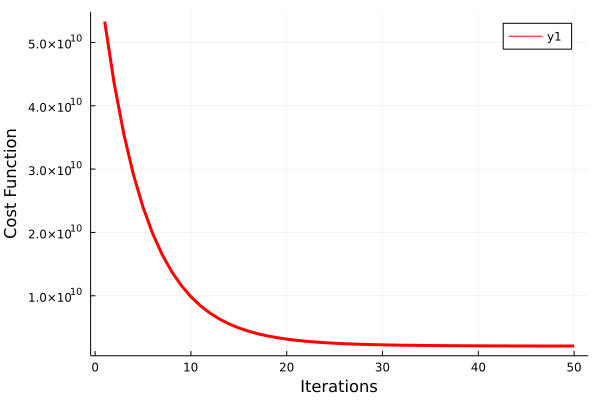

In [7]:
Plots.plot(getindex.(result, 1), getindex.(result, 3), linewidth=3, color=:red, 
        xlabel="Iterations",
        ylabel="Cost Function")

In [59]:
# Normal equa2on: Method to solve for Theta analytically.

XTranspose = X'
XTranposeX = XTranspose * X
XTranposeXInv = inv(XTranposeX)
Theta = (XTranposeXInv * XTranspose) * y
CostFunction(X, y, Theta)

2.0432800506028283e9

In [62]:
mu_sqft = mean(C.sqft)
mu_bedrooms = mean(C.bedrooms)
std_sqft = std(C.sqft)
std_bedrooms = std(C.bedrooms)

# Now, once you have found θ using this method, use it to make a price prediction for a 1650-square-foot house with 3 bedrooms.

normalize1650sqft = (1650 - mu_sqft)/std_sqft
normalize3br = (3 - mu_bedrooms)/std_bedrooms

predicted_price = [1 normalize1650sqft normalize3br] * Theta

1-element Vector{Float64}:
 293081.46433489624

In [68]:
predicted_price_using_gradient = [1 normalize1650sqft normalize3br] * result[iterations][2]

1-element Vector{Float64}:
 292748.0852321537